<a href="https://colab.research.google.com/github/eliot28/desafioLatam/blob/main/Tutoria_2_python_estadistica_g80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

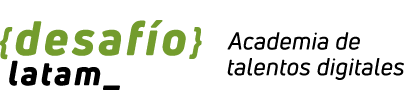

 # <font color='green'>Probabilidades con Python</font>

Vamos a mostrar las principales herramientas para calcular probabilidades con Python, a partir de las herramientas que ya conocemos para DataFrames y algunso datos. Para esto, cargaremos un DataFrame con datos relacionados con la salud mental de un conjunto de estudiantes.

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('salud_mental.csv',delimiter=',')
df

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...
96,13/07/2020 19:56:49,Female,21.0,BCS,year 1,3.50 - 4.00,No,No,Yes,No,No
97,13/07/2020 21:21:42,Male,18.0,Engineering,Year 2,3.00 - 3.49,No,Yes,Yes,No,No
98,13/07/2020 21:22:56,Female,19.0,Nursing,Year 3,3.50 - 4.00,Yes,Yes,No,Yes,No
99,13/07/2020 21:23:57,Female,23.0,Pendidikan Islam,year 4,3.50 - 4.00,No,No,No,No,No


 ## <font color='green'>Conteo de casos por columna</font>

Podemos contar, para una columna dada, la cantidad de casos que corresponden a un valor dado. Contaremos, entonces, la cantidad de hombres y de mujeres en nuestro DataFrame utilizando el método **value_counts()**

In [2]:
df.columns

Index(['Timestamp', 'Choose your gender', 'Age', 'What is your course?',
       'Your current year of Study', 'What is your CGPA?', 'Marital status',
       'Do you have Depression?', 'Do you have Anxiety?',
       'Do you have Panic attack?',
       'Did you seek any specialist for a treatment?'],
      dtype='object')

In [4]:
df['Do you have Anxiety?'].value_counts()

Do you have Anxiety?
No     67
Yes    34
Name: count, dtype: int64

In [6]:
type(df['Do you have Anxiety?'].value_counts())

pandas.core.series.Series

In [5]:
df['Do you have Anxiety?'].value_counts()['No']

67

In [7]:
#¿Cuál es la probabilidad de que un encuestado sea hombre? ¿O mujer?
conteo_hombres = df['Choose your gender'].value_counts()['Male']
conteo_mujeres = df['Choose your gender'].value_counts()['Female']
conteo_casados = df['Marital status'].value_counts()['Yes']
total=conteo_hombres+conteo_mujeres

print(conteo_hombres)
print(conteo_mujeres)
print(conteo_casados)

26
75
16


Y a partir de ello es fácil calcular las probabilidades de algunos sucesos.

In [8]:
p_hombre=conteo_hombres/total
p_mujer=conteo_mujeres/total
p_casados=conteo_casados/total
print(p_hombre)
print(p_mujer)
print(p_casados)

0.25742574257425743
0.7425742574257426
0.15841584158415842


 ## <font color='green'>Contando con condiciones</font>

 Para contar casos por columnas utilizando condiciones, primero les daremos un nombre. Esto nos permitirá utilizar el método **sum()** con los conectores **&** y **|** que utilizaremos según corresponda.

In [9]:
condicion1 = df['Choose your gender'] == 'Male' #condición 1: ser hombre
condicion2 = df['Marital status'] =='Yes' #condicion 2: ser casado o casada
condicion3 = df['Do you have Anxiety?'] =='Yes' #condicion 3: tener ansiedad

#calculamos ahora las probabilidades
p_hombre_y_casado = (condicion1 & condicion2).sum()/total #probabilidad de ser hombre y casado
p_casado_o_ansiedad = (condicion2 | condicion3).sum()/total #probabilidad de ser casado o casada, y tener ansiedad
print(p_hombre_y_casado)
print(p_casado_o_ansiedad)

## y = &
## o = |

0.0297029702970297
0.42574257425742573


 ## <font color='green'>Probabilidad condicional</font>

 A partir de lo anterior, es posible calcular probabilidades aplicando las fórmulas que ya conocemos. En nuestro caso, plantearemos la siguiente situación: si se escoje a una persona al azar, y se sabe que es mujer, ¿cuál es la probabilidad de que tenga ansiedad?

 Para esto, definiremos primero una cuarta condición: ser mujer, para poder incluirla en los conteos. Observa que podríamos haber realizado, en un principio, una definición de todas las condiciones para utilizarlas posteriormente

In [11]:
condicion4 = df['Choose your gender'] == 'Female'

Calcularemos, entonces, la probabilidad de ser mujer **y** tener ansiedad

In [12]:
p_ansiedad_y_mujer = (condicion3 & condicion4).sum()/total
print(p_ansiedad_y_mujer)

0.2376237623762376


Lo que nos permite calcular la probabilidad de que tenga ansiedad dado que es mujer, dividiendo por la probabilidad de que sea mujer

In [13]:
## P(A|M) = P(A y M) / P(M)

p_ansiedad_dado_mujer = p_ansiedad_y_mujer/p_mujer
print(p_ansiedad_dado_mujer)

0.32


In [14]:
df.columns

Index(['Timestamp', 'Choose your gender', 'Age', 'What is your course?',
       'Your current year of Study', 'What is your CGPA?', 'Marital status',
       'Do you have Depression?', 'Do you have Anxiety?',
       'Do you have Panic attack?',
       'Did you seek any specialist for a treatment?'],
      dtype='object')

In [19]:
#que sea ingeniero y tenga depresión

ingeniero = df['What is your course?'] == 'Engineering'
depresion = df['Do you have Depression?'] == 'Yes'

p_ing_y_dep = (ingeniero & depresion).sum()/total
print(p_ing_y_dep)

0.06930693069306931


In [18]:
## sea ing dado que tiene depresion

#P(Ing | Dep) = P(Ing y Dep) / P(Dep)

p_depresion = depresion.sum()/total

print(p_depresion)

0.3465346534653465


In [20]:
p_ing_dado_dep = p_ing_y_dep / p_depresion

print(p_ing_dado_dep)

0.20000000000000004


In [21]:
df['Choose your gender'].value_counts()

Choose your gender
Female    75
Male      26
Name: count, dtype: int64

In [22]:
p_ing = ingeniero.sum()/total
print(p_ing)

0.16831683168316833


In [23]:
#P(Dep | ing) = P(dep y ing) / P(ing)

p_dep_dado_ing = p_ing_y_dep / p_ing
print(p_dep_dado_ing)

0.411764705882353


In [28]:
## para hombre
hombre = df['Choose your gender'] == 'Male'
mujer = df['Choose your gender'] == 'Female'

df_hombre = df[hombre]
df_mujer = df[mujer]
df_hombre

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No
5,8/7/2020 12:31,Male,19.0,Engineering,Year 2,3.50 - 4.00,No,No,No,Yes,No
9,8/7/2020 12:39,Male,18.0,Irkhs,year 1,3.50 - 4.00,No,No,Yes,Yes,No
13,8/7/2020 12:41,Male,19.0,Engineering,year 1,3.00 - 3.49,No,No,No,No,No
15,8/7/2020 12:43,Male,24.0,BCS,Year 3,3.50 - 4.00,No,No,No,No,No
27,8/7/2020 13:41,Male,18.0,Engineering,Year 2,3.00 - 3.49,Yes,Yes,Yes,No,No
31,8/7/2020 14:29,Male,18.0,BCS,year 2,3.00 - 3.49,No,No,No,No,No
32,8/7/2020 14:29,Male,19.0,BCS,year 1,3.50 - 4.00,No,No,No,Yes,No


In [30]:
ingeniero_h = df_hombre['What is your course?'] == 'Engineering'
depresion_h = df_hombre['Do you have Depression?'] == 'Yes'

p_dep_y_ing_hombre = (ingeniero_h & depresion_h).sum()/len(df_hombre)

print(p_dep_y_ing_hombre)

0.07692307692307693


In [31]:
p_ing_hombre = ingeniero_h.sum()/len(df_hombre)

p_dep_dado_ing_hombre = p_dep_y_ing_hombre/p_ing_hombre

print(f'Para hombre: {p_dep_dado_ing_hombre}')

Para hombre: 0.4


In [29]:
## para mujeres
df_mujer

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
6,8/7/2020 12:32,Female,23.0,Pendidikan islam,year 2,3.50 - 4.00,Yes,Yes,No,Yes,No
7,8/7/2020 12:33,Female,18.0,BCS,year 1,3.50 - 4.00,No,No,Yes,No,No
8,8/7/2020 12:35,Female,19.0,Human Resources,Year 2,2.50 - 2.99,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...
94,13/07/2020 17:30:44,Female,24.0,Fiqh,Year 3,0 - 1.99,No,No,No,Yes,No
95,13/07/2020 19:08:32,Female,18.0,Islamic Education,year 1,3.50 - 4.00,No,No,No,No,No
96,13/07/2020 19:56:49,Female,21.0,BCS,year 1,3.50 - 4.00,No,No,Yes,No,No
98,13/07/2020 21:22:56,Female,19.0,Nursing,Year 3,3.50 - 4.00,Yes,Yes,No,Yes,No


In [32]:
ingeniero_m = df_mujer['What is your course?'] == 'Engineering'
depresion_m = df_mujer['Do you have Depression?'] == 'Yes'

p_dep_y_ing_mujer = (ingeniero_m & depresion_m).sum()/len(df_mujer)

print(p_dep_y_ing_mujer)

0.06666666666666667


In [33]:
p_ing_mujer = ingeniero_m.sum()/len(df_mujer)

p_dep_dado_ing_mujer = p_dep_y_ing_mujer/p_ing_mujer

print(f'Para mujer: {p_dep_dado_ing_mujer}')

Para mujer: 0.41666666666666663


In [34]:
exams = pd.read_csv('exams.csv')
exams

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68
...,...,...,...,...,...,...,...,...
995,male,group C,high school,standard,none,73,70,65
996,male,group D,associate's degree,free/reduced,completed,85,91,92
997,female,group C,some high school,free/reduced,none,32,35,41
998,female,group C,some college,standard,none,73,74,82


In [35]:
#1. Que su grupo étnico sea A o B

grupoA = exams['race/ethnicity'] == 'group A'
grupoB = exams['race/ethnicity'] == 'group B'


total = len(exams)
p_grupo_a_o_b = (grupoA | grupoB).sum()/total

print(p_grupo_a_o_b)


0.284


In [37]:
#2. Que su preparación para el examen sea completa

exams['test preparation course'].value_counts()

completado = exams['test preparation course'] == 'completed'

p_complentado = completado.sum()/total
print(p_complentado)

0.335


In [40]:
p=exams['test preparation course'].value_counts(normalize=True)['completed']
print(p)

0.335


In [38]:
# 3. Que tenga un puntaje en matemáticas superior o igual a 50
puntate_mate = exams['math score'] >= 50

p_puntaje_mate = puntate_mate.sum()/total
print(p_puntaje_mate)

0.855


In [42]:
#5. Que el nivel educacional de sus padres sea ‘high school”, si se sabe que pertenece al grupo étnico A o B

#A = nivel educacional padres high school
#B = grupo etnico A o B

#P(A|B) = P(A y B)/P(B)

#P(A y B)

nivel_educacion_padre = exams['parental level of education'] == 'high school'

p_nivel_edu_y_grupo_A_o_B = (nivel_educacion_padre & (grupoA | grupoB)).sum()/total
print(p_nivel_edu_y_grupo_A_o_B)

0.054


In [43]:
p_nivel_edu_dado_grupo_A_o_B = p_nivel_edu_y_grupo_A_o_B/p_grupo_a_o_b

print(p_nivel_edu_dado_grupo_A_o_B)

0.19014084507042256


In [ ]:
#6. Que su preparación para el examen sea completa, si se sabe que su puntaje en matemáticas es superior o igual a 50

In [45]:
p_examen_y_puntaje = (completado & puntate_mate).sum()/total
print(p_examen_y_puntaje)

0.3


In [46]:
p_examen_dado_puntaje = p_examen_y_puntaje/p_puntaje_mate
print(p_examen_dado_puntaje)

0.3508771929824561
